## [강남 아이펠] team SH



전력사용량 데이터셋
- 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터(전력사용량(kWh)포함)


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/datathon/

/content/drive/.shortcut-targets-by-id/1UbcjdsWF_x91QZmrc40QfgjuFcT0o9_f/datathon


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# 한국어 폰트 설치를 확인합니다.  
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datathon/data/train.csv", encoding='cp949')

In [ ]:
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


데이터프레임에는 가시적인 결측치가 없다.

In [ ]:
df["num"].nunique() # 총60개의 건물

60

In [ ]:
print(df.date_time.min(), df.date_time.max()) # 2020년 6월 1일 00시부터 2020년 8월 24일 23시까지 데이터

2020-06-01 00 2020-08-24 23


In [ ]:
time=pd.date_range(df.date_time.min()+":00:00", df.date_time.max()+":00:00", freq="H") # 2020년 6월 1일 00시부터 2020년 8월 24일 23시까지 시간단위로 생성한 데이터
# 한 건물당 기간동안 수집된 시간별 전기사용량 데이터 * 총 건물수
print("한 건물당 기간동안 수집된 시간별 전기사용량 데이터 * 총 건물수:",time.shape[0] *df["num"].nunique())
print("데이터셋의 데이터:", df.shape[0])

한 건물당 기간동안 수집된 시간별 전기사용량 데이터 * 총 건물수: 122400
데이터셋의 데이터: 122400


- 결측치가 없는 데이터이다.

--------------------------
### 데이터프레임의 컬럼명 바꾸기

In [ ]:
df.columns=['num', 'date_time',"power","temp",
            "speed","humidity","rain","sun",
            "non_elec","photo"]
df.head()

,num,date_time,power,temp,speed,humidity,rain,sun,non_elec,photo
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 비전기냉방설비운영(non_elec) 컬럼이 무엇일까 궁금해서 검색해보았다.    
[가스냉방 설치지원금 인상 ... 6월 시행](http://www.todayenergy.kr/news/articleView.html?idxno=225372)   
[가스냉방 확대하면 전력피크 문제 해소](https://www.koenergy.co.kr/news/articleView.html?idxno=104506)

비전기냉방설비운영이란 가스냉방을 설치하고 운영하는지를 말한다. 

"정부는 2011년부터 가스냉방 설치비의 약 10%를 지원하고, 기기별 효율과 용량 등에 따라 차등 지급해 고효율기기 보급을 유도했다. 또 일정규모 이상 공공‧민간 건물에 비전기식 냉방을 의무화했다.

이에 따라 공공기관은 2011년 7월부터 연면적 1000㎡이상 건축물의 신축‧증축 및 냉방설비 교체시 설비의 60% 이상을 비전기식으로 설치 의무화했다.

민간건물의 경우 2008년 4월부터 일정규모 이상 건축물(신축‧개축‧재축)에 중앙집중 냉방설비 설치시 최대 냉방부하의 60% 이상을 비전기식으로 채택 의무화했다.

"[출처 : 에너지데일리](https://www.energydaily.co.kr/news/articleView.html?idxno=108652)

In [ ]:
#print("건물번호",df["num"].unique())# 건물번호는 1~60 
print("비전기 냉방설비운영",df["non_elec"].unique()) # 0과 1로 이루어진 데이터

비전기 냉방설비운영 [0. 1.]


In [ ]:
elec_photo=df.loc[(df["non_elec"]==1)&(df["photo"]==1), "num"].index # 비전력냉방설비한 건물의 인덱스
elec_nphoto=df.loc[(df["non_elec"]==1)&(df["photo"]==0), "num"].index      # 비전력냉방설비 하지 않은 건물인덱스
nelec_photo=df.loc[(df["non_elec"]==0)&(df["photo"]==1), "num"].index  # 비전력냉방설비한 건물인덱스
nelec_nphoto=df.loc[(df["non_elec"]==0)&(df["photo"]==0), "num"].index      # 비전력냉방설비 하지 않은 건물인덱스

In [ ]:
num_elec_photo=df.loc[(df["non_elec"]==1)&(df["photo"]==1), "num"].unique() # 비전력냉방설비한 건물 번호
num_elec_nphoto=df.loc[(df["non_elec"]==1)&(df["photo"]==0), "num"].unique()      # 비전력냉방설비 하지 않은 건물번호
num_nelec_photo=df.loc[(df["non_elec"]==0)&(df["photo"]==1), "num"].unique()  # 비전력냉방설비한 건물번호
num_nelec_nphoto=df.loc[(df["non_elec"]==0)&(df["photo"]==0), "num"].unique()      # 비전력냉방설비 하지 않은 건물번호

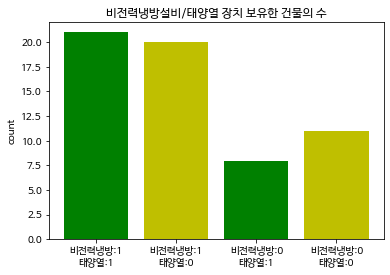

In [ ]:
plt.bar(list(range(4)), [num_elec_photo.shape[0],num_elec_nphoto.shape[0],num_nelec_photo.shape[0],num_nelec_nphoto.shape[0]],color=["g","y","g","y"])
plt.xticks(list(range(4)),["비전력냉방:1\n태양열:1","비전력냉방:1\n태양열:0","비전력냉방:0\n태양열:1","비전력냉방:0\n태양열:0"])
plt.title("비전력냉방설비/태양열 장치 보유한 건물의 수")
plt.ylabel("count")
plt.show()

In [ ]:
df["date_time"]=pd.to_datetime(df["date_time"]) # date_time 컬럼을 문자열에서 datetime 자료형으로 바꿔준다.

In [ ]:
df["dayname"]=df["date_time"].copy()
df["dayname"]=df["dayname"].dt.dayofweek # 월요일은 0 ~ 일요일 6 / 숫자부여한다.

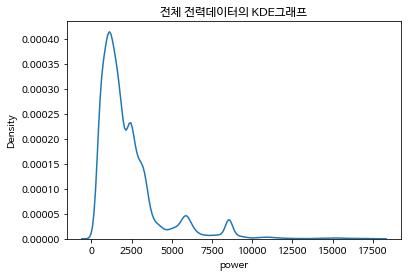

In [ ]:
sns.kdeplot(data=df, x="power")
plt.title("전체 전력데이터의 KDE그래프")
plt.show()

비전기냉방설비운영이 1인 건물의 시간당 전력사용분포를 보면 주말과 평일의 분포가 다른 것을 확인 할수 있다. 반면 비전기냉방설비운영이 0인 건물은 주말과 평일의 분포가 거의 비슷하다.

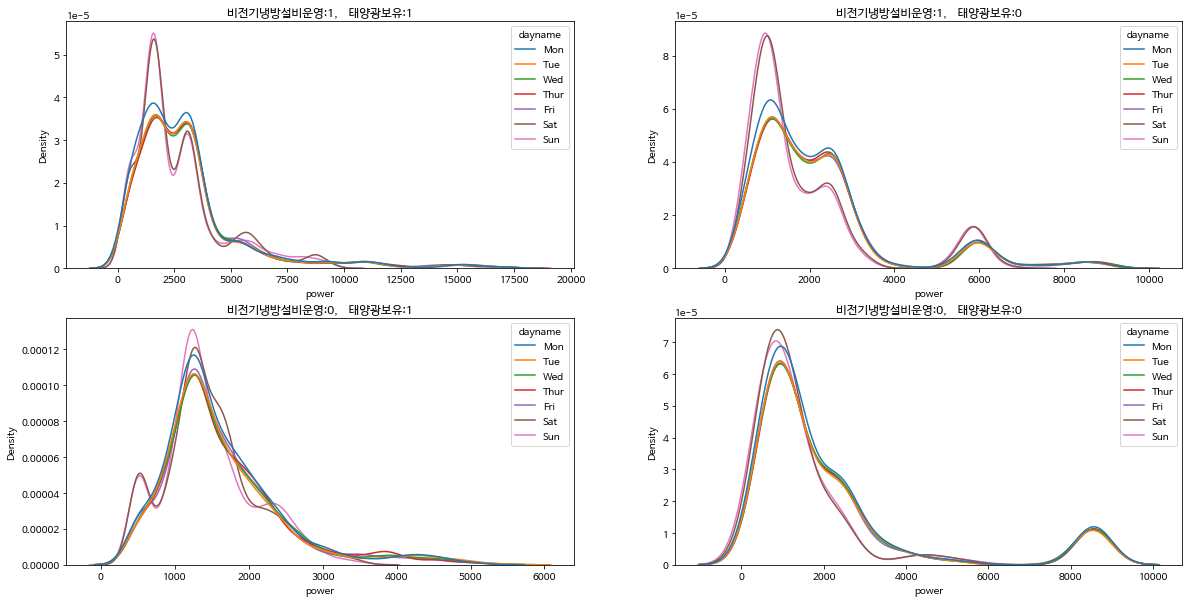

In [ ]:
day={0:"Mon",1:"Tue", 2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}
titles=["비전기냉방설비운영:1,	태양광보유:1","비전기냉방설비운영:1,	태양광보유:0","비전기냉방설비운영:0,	태양광보유:1","비전기냉방설비운영:0,	태양광보유:0"]

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
for i,(j,t) in enumerate(zip([elec_photo, elec_nphoto, nelec_photo, nelec_nphoto],titles)):
  temp=df.loc[j].copy()
  temp["dayname"]=temp["dayname"].map(lambda x: day[x])

  plt.subplot(2,2,i+1)
  sns.kdeplot(data=temp, x="power", hue="dayname")
  plt.title(t)
plt.show()

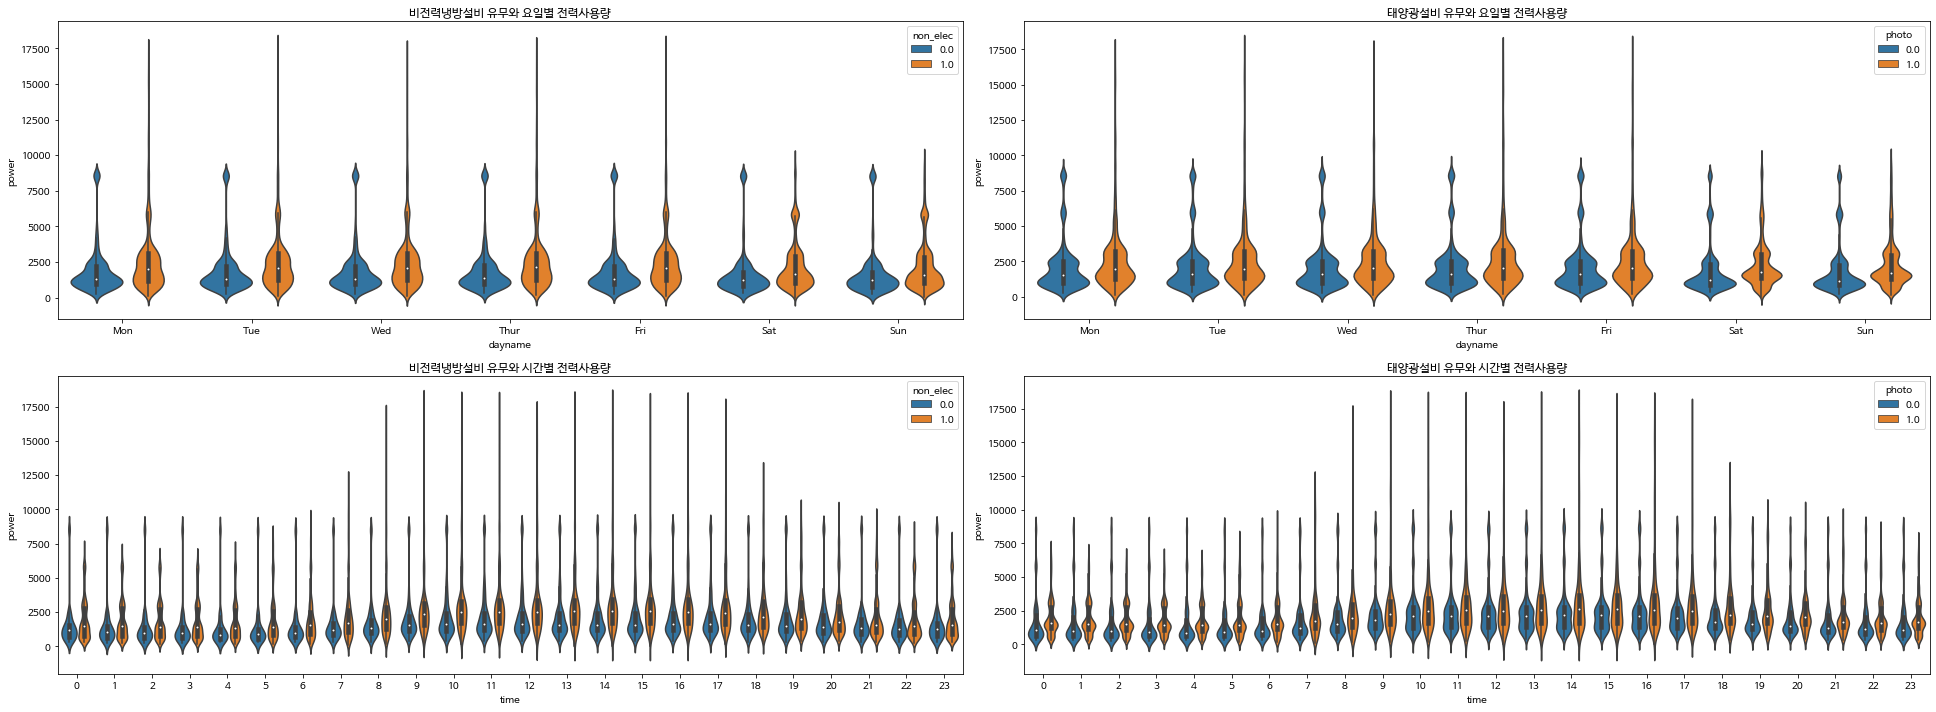

In [ ]:
df["time"]=df["date_time"].dt.hour

plt.figure(figsize=(27,10))
plt.subplot(2,2,1)
sns.violinplot(data=df, x="dayname",y="power",hue="non_elec")
plt.title("비전력냉방설비 유무와 요일별 전력사용량")
plt.xticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"])
plt.subplot(2,2,2)
sns.violinplot(data=df, x="dayname",y="power",hue="photo")
plt.title("태양광설비 유무와 요일별 전력사용량")
plt.xticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"])

plt.subplot(2,2,3)
sns.violinplot(data=df, x="time",y="power",hue="non_elec")
plt.title("비전력냉방설비 유무와 시간별 전력사용량")
plt.subplot(2,2,4)
sns.violinplot(data=df, x="time",y="power",hue="photo")
plt.title("태양광설비 유무와 시간별 전력사용량")
plt.tight_layout()
plt.show()

비전력냉방설비가 0인 건물은 평일과 주말, 8시부터 18시와 그 외의 시간 사이의 전력사용량이 차이가 없지만  없지만, 비전력냉방설비가 1인 건물들은 적은 수이지만 매우 많은 양(175000kWh)의 전력을 사용한다는 것을 알수 있다. 태양광설비 역시 비슷한 경향을 보이는 것을 알수 있다.
- 주말과 7~18시 사이의 데이터를 모아서 시각화해보자.

In [ ]:
lsts=[]
for i in df["time"]:
  if 7<=i<=18:
    lsts.append(1)
  else:lsts.append(0)

df["8to5"]=lsts

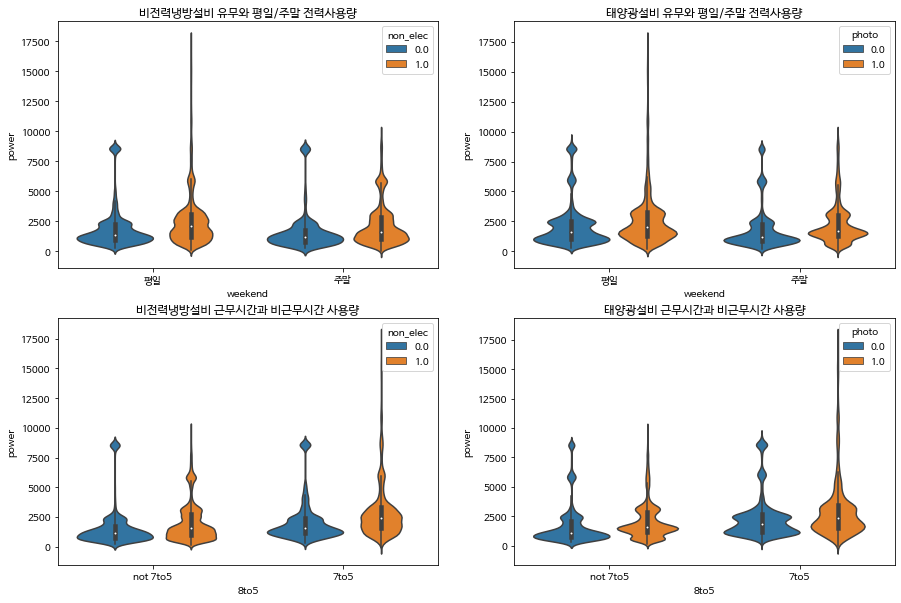

In [ ]:
dft=df.copy()
dft["weekend"]=dft["dayname"].copy()
d={0:0,1:0,2:0,3:0,4:0,5:1,6:1}
dft["weekend"]=dft["weekend"].map(lambda x: d[x])

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(data=dft, x="weekend",y="power",hue="non_elec")
plt.title("비전력냉방설비 유무와 평일/주말 전력사용량")
plt.xticks([0,1],["평일","주말"])
plt.subplot(2,2,2)
sns.violinplot(data=dft, x="weekend",y="power",hue="photo")
plt.xticks([0,1],["평일","주말"])
plt.title("태양광설비 유무와 평일/주말 전력사용량")

plt.subplot(2,2,3)
sns.violinplot(data=dft, x="8to5",y="power",hue="non_elec")
plt.xticks([0,1],["not 7to5","7to5"])
plt.title("비전력냉방설비 근무시간과 비근무시간 사용량")

plt.subplot(2,2,4)
sns.violinplot(data=dft, x="8to5",y="power",hue="photo")
plt.xticks([0,1],["not 7to5","7to5"])
plt.title("태양광설비 근무시간과 비근무시간 사용량")

plt.show()

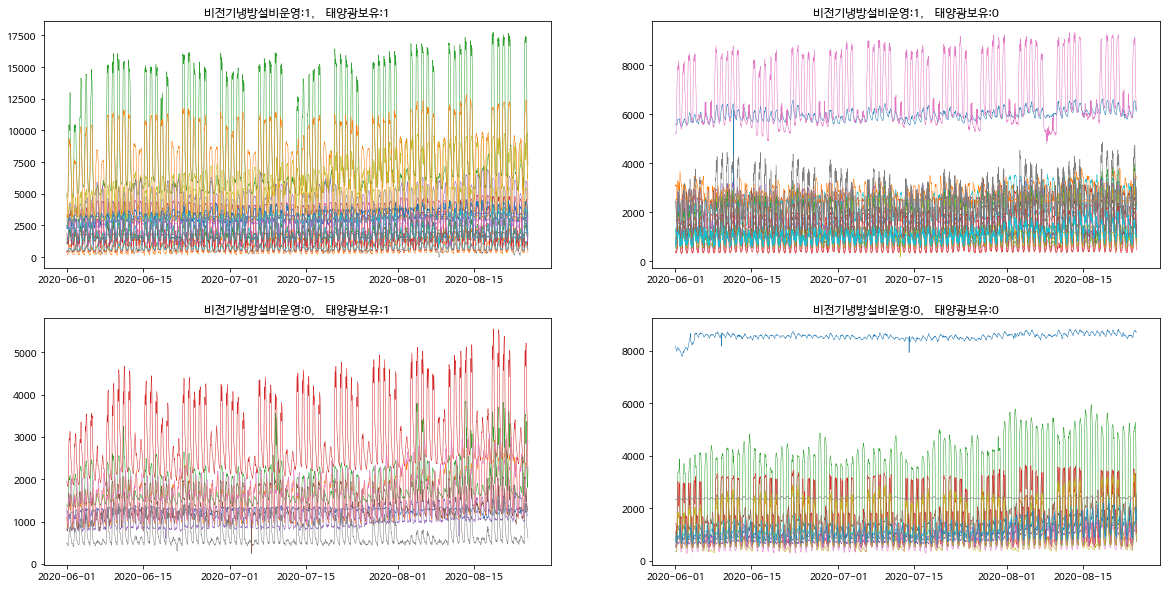

In [ ]:
plt.figure(figsize=(20,10))
lst_m=[num_elec_photo,num_elec_nphoto,num_nelec_photo,num_nelec_nphoto]
for idx, (lst_,t) in enumerate(zip(lst_m,titles)):
  plt.subplot(2,2,idx+1)
  for i in lst_:
    y=df.loc[df["num"]==i,"power"].tolist()
    plt.plot(time,y,linewidth=0.5)
    plt.title(t)
  #plt.xticks(rotation=90)

plt.show()

각 건물별 기후 데이터를 boxplot으로 그려보자 

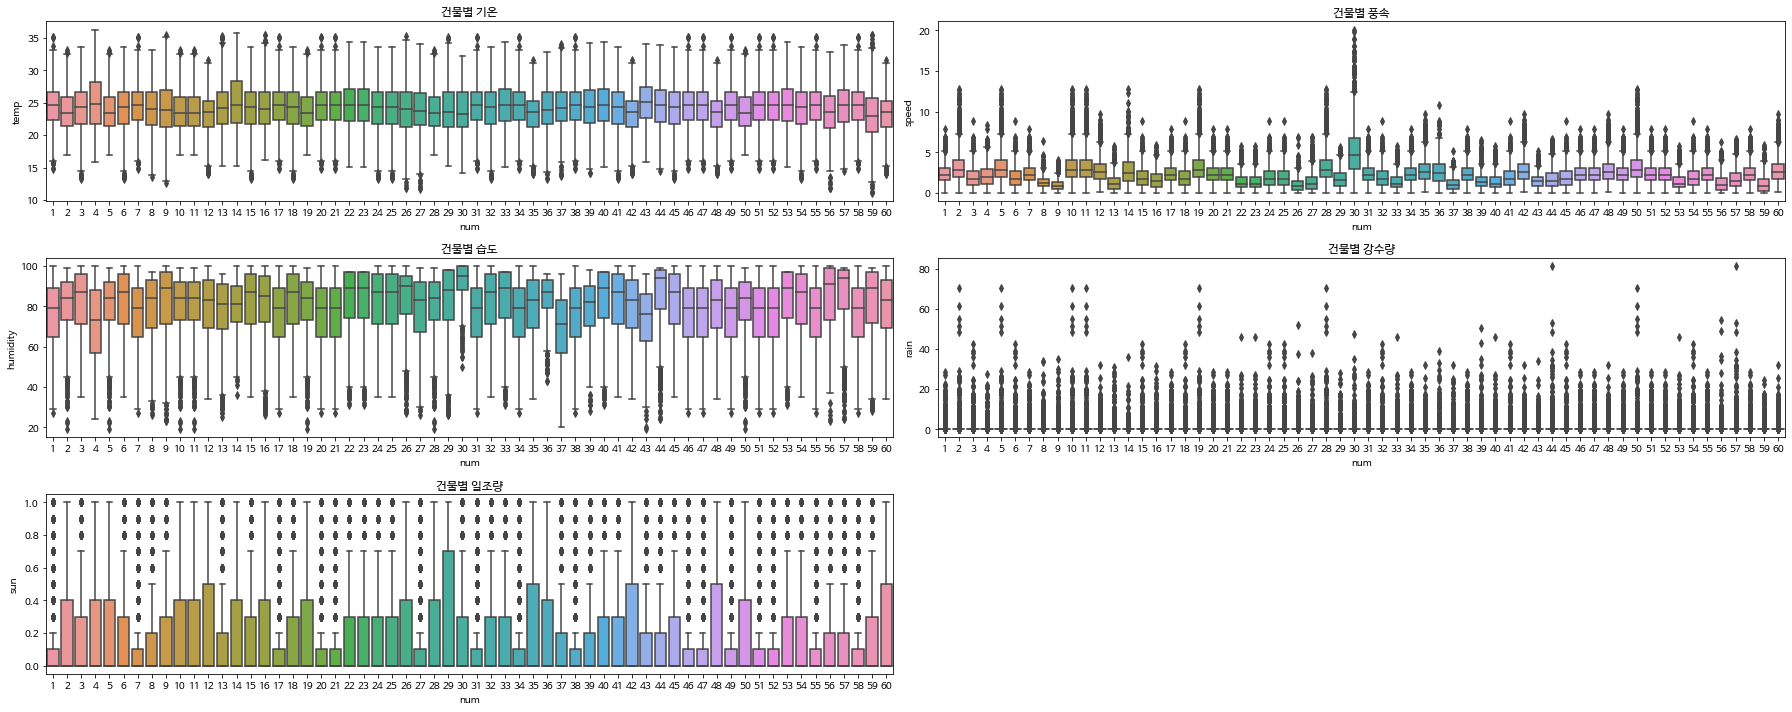

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(3,2,1)
sns.boxplot(data=df, y="temp", x="num")
plt.title("건물별 기온")
plt.subplot(3,2,2)
sns.boxplot(data=df, y="speed", x="num")
plt.title("건물별 풍속")
plt.subplot(3,2,3)
sns.boxplot(data=df, y="humidity", x="num")
plt.title("건물별 습도")
plt.subplot(3,2,4)
sns.boxplot(data=df, y="rain", x="num")
plt.title("건물별 강수량")
plt.subplot(3,2,5)
sns.boxplot(data=df, y="sun", x="num")
plt.title("건물별 일조량")
plt.tight_layout()
plt.show()

- 각 건물별 기후에 관한 boxplot 을 보니까 같은 박스플롯으로 보이는 그래프가 보였다. 즉, __같은 기온데이터를 가진 건물이자 같은 지역에 있는 건물이라고 추측된다.__
- 각 __건물들의 기후데이터에 대한 대푯값(평균, 표준편차, 최대, 최솟값, 중앙값)이 25가지 모두 일치한다면 두 건물은 가까운 지역에 있는 건물__ 로 생각해도 될 것이라고 생각이 들었다.

In [ ]:
weather=df[["num","temp","speed","humidity","rain","sun"]].groupby("num").aggregate([np.mean,np.std,min,np.median,max])
weather.columns=["%s_%s"%(i,j) for i in ["temp","speed","humidity","rain","sun"] for j in ["mean","std","min","median","max"] ]

In [ ]:
weather.head(2)

,temp_mean,temp_std,temp_min,temp_median,temp_max,speed_mean,speed_std,speed_min,speed_median,speed_max,...,rain_mean,rain_std,rain_min,rain_median,rain_max,sun_mean,sun_std,sun_min,sun_median,sun_max
num,,,,,,,,,,,,,,,,,,,,,
1,24.608578,3.267733,14.8,24.6,35.2,2.34598,1.111222,0.0,2.2,7.9,...,0.493873,2.309268,0.0,0.0,28.6,0.184608,0.343522,0.0,0.0,1.0
2,23.623333,3.092814,16.9,23.4,33.1,3.19799,1.941660,0.0,2.8,12.8,...,0.720098,3.840834,0.0,0.0,70.4,0.238725,0.391725,0.0,0.0,1.0


- 각 건물별 기후데이터에 대한 대푯값을 연결해서 문자열로 만들었다.
- 이 문자열이 일치하는 건물들은 __최소한 기상청의 날씨 집계하는 같은 범위 안에 있는 건물이다__

In [ ]:
weather["W"]=["_".join(map(str,weather.loc[i].tolist())) for i in range(1,weather.shape[0]+1)] 

In [ ]:
lst_1, lst_2=[],[] # 2개 이하 같은 건물이 있다면 리스트 lst_1/ 2개 건물을 초과하는 그룹은  
for i in weather["W"].unique():
  if weather.loc[weather["W"]==i].index.shape[0]>2:
    lst_2.append(weather.loc[weather["W"]==i].index.tolist())
  else:
    lst_1.extend(weather.loc[weather["W"]==i].index.tolist())

In [ ]:
lst_2 # 기후데이터의 대푯값 25개가 일치하는 건물번호끼리 리스트로 묶었다.

[[1, 7, 17, 20, 21, 31, 34, 38, 46, 47, 49, 51, 52, 55, 58],
 [2, 5, 10, 11, 19, 28, 50],
 [3, 6, 15, 18, 24, 25, 32, 41, 45, 54],
 [12, 35, 42, 48, 60],
 [22, 23, 33, 40, 53]]

건물들의 온도(temp), 풍속(speed), 습도(humidity),강수량(rain),일조량(sun)에 대한 각각의 평균, 표준편차, 최솟값, 최대값, 중앙값이 일치했다.    
실제로 이들의 기후가 시계열적으로 일치하는지 체크하기 위해서 가장 많은 (15개) 건물이 일치하는 지역인 lst_2\[0\]의 기후데이터들을 겹쳐지도록 그래프로 그려보았다.     
각 기후별로 15개의 그래프를 겹쳐지게 그렸지만 하나의 그래프를 그린 것처럼 보인다. 즉, 동일한 기후 데이터를 갖고 있다.    

-----------------------

A 지역: [1, 7, 17, 20, 21, 31, 34, 38, 46, 47, 49, 51, 52, 55, 58]   

B 지역: [2, 5, 10, 11, 19, 28, 50]   
C 지역: [3, 6, 15, 18, 24, 25, 32, 41, 45, 54]   
D 지역: [12, 35, 42, 48, 60]   
E 지역: [22, 23, 33, 40, 53]


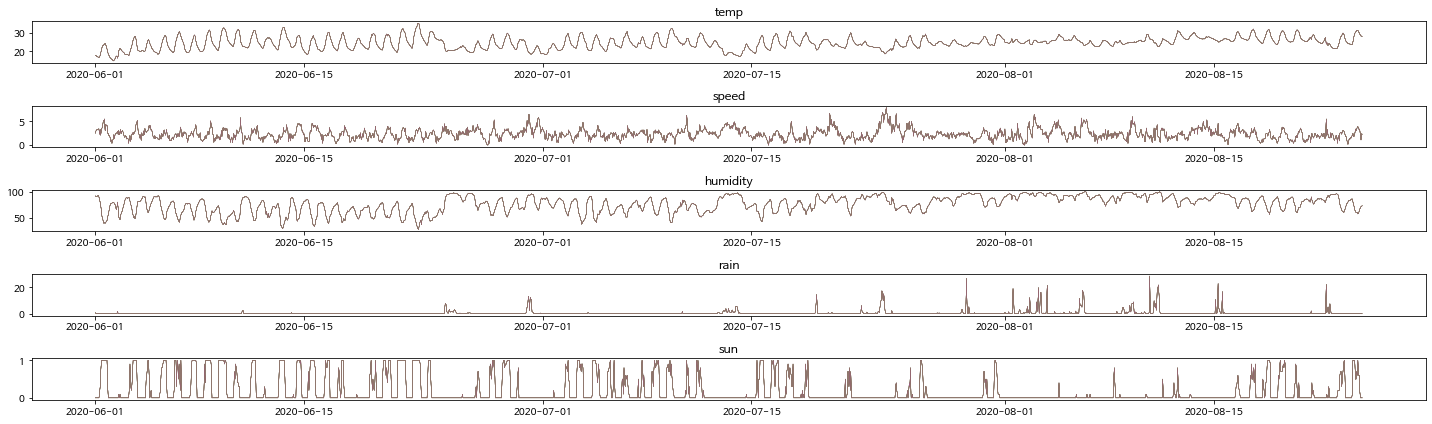

In [ ]:
plt.figure(figsize=(20,6))
for i,j in enumerate(["temp","speed","humidity","rain","sun"]):
  plt.subplot(5,1,i+1)
  for k in lst_2[0]:
    plt.plot(time,df.loc[df["num"]==k,j].tolist(),linewidth=0.2)
    plt.title(j)

plt.tight_layout()
plt.show()

### 같은 지역의 건물들을 모아서 전력소비량과 기후 데이터의 상관계수를 히트맵으로 그려보자 

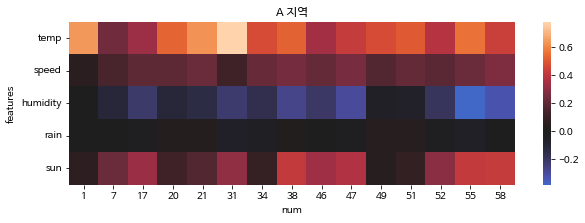

In [ ]:
temp=df.loc[df["num"]==lst_2[0][0],['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
corr_df=pd.DataFrame(temp.corr()["power"][1:])
corr_df.columns=["1"]
for i in lst_2[0][1:]:
  temp=df.loc[df["num"]==i,['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
  corr_df["%d"%i]=temp.corr()["power"][1:]

plt.figure(figsize=(10,3))
sns.heatmap(corr_df,center=0)
plt.xlabel("num")
plt.ylabel("features")
plt.title("A 지역")
plt.show()

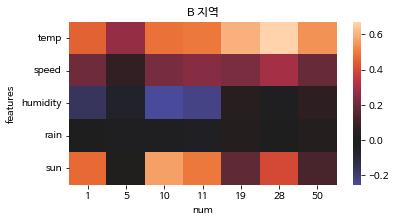

In [ ]:
temp=df.loc[df["num"]==lst_2[1][0],['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
corr_df=pd.DataFrame(temp.corr()["power"][1:])
corr_df.columns=["1"]
for i in lst_2[1][1:]:
  temp=df.loc[df["num"]==i,['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
  corr_df["%d"%i]=temp.corr()["power"][1:]

plt.figure(figsize=(6,3))
sns.heatmap(corr_df,center=0)
plt.xlabel("num")
plt.ylabel("features")
plt.title("B 지역")
plt.show()

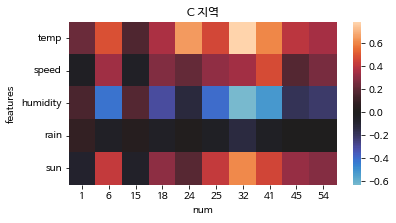

In [ ]:
temp=df.loc[df["num"]==lst_2[2][0],['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
corr_df=pd.DataFrame(temp.corr()["power"][1:])
corr_df.columns=["1"]
for i in lst_2[2][1:]:
  temp=df.loc[df["num"]==i,['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
  corr_df["%d"%i]=temp.corr()["power"][1:]

plt.figure(figsize=(6,3))
sns.heatmap(corr_df,center=0)
plt.xlabel("num")
plt.ylabel("features")
plt.title("C 지역")
plt.show()

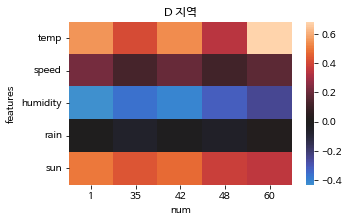

In [ ]:
temp=df.loc[df["num"]==lst_2[3][0],['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
corr_df=pd.DataFrame(temp.corr()["power"][1:])
corr_df.columns=["1"]
for i in lst_2[3][1:]:
  temp=df.loc[df["num"]==i,['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
  corr_df["%d"%i]=temp.corr()["power"][1:]

plt.figure(figsize=(5,3))
sns.heatmap(corr_df,center=0)
plt.xlabel("num")
plt.ylabel("features")
plt.title("D 지역")
plt.show()

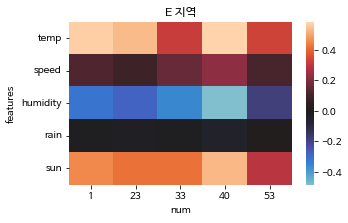

In [ ]:
temp=df.loc[df["num"]==lst_2[4][0],['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
corr_df=pd.DataFrame(temp.corr()["power"][1:])
corr_df.columns=["1"]
for i in lst_2[4][1:]:
  temp=df.loc[df["num"]==i,['power', 'temp', 'speed', 'humidity', 'rain', 'sun']]
  corr_df["%d"%i]=temp.corr()["power"][1:]

plt.figure(figsize=(5,3))
sns.heatmap(corr_df,center=0)
plt.xlabel("num")
plt.ylabel("features")
plt.title("E 지역")
plt.show()

- 지역 A,B,C,D,E 전반적으로 tepm(기온 변수)와 sun(일조량 변수)가 전력소비량과 강한 양의 상관관계를 갖는 것을 알수 있었다.
- 반면 A, B지역은  humidity(습도 변수)가 약한 음의 상관관계를 보이는 반면 C,D,E지역이 좀 더 강한 음의 상관관계를 갖는 것을 알수 있다.
- C, D, E 지역의 건물들의 전력소비패턴이 습도가 높은 시기에 전력을 많이 쓰는 것을 알수 있다.
- 지역 A,B,C,D,E의 기후 변수들을 바이올린 플롯으로 나타내어보았다. 실제로 C,D,E 지역이 A,B 지역에 비해서 습도(humidity)가 높은 것을 볼 수 있었다.

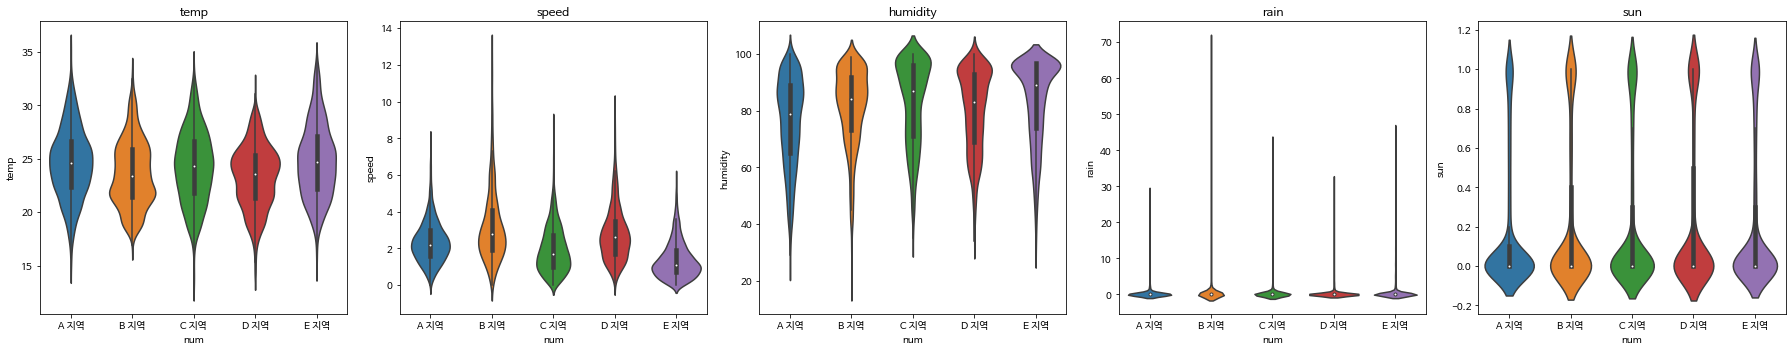

In [ ]:
tempt=df.loc[(df["num"]==1)|(df["num"]==2)|(df["num"]==3)|(df["num"]==12)|
       (df["num"]==22),["temp","speed","humidity","rain","sun","num"]]
plt.figure(figsize=(25,5))
for i,j in enumerate(["temp","speed","humidity","rain","sun"]):
  plt.subplot(1,5,i+1)
  sns.violinplot(data=tempt, x="num", y=j)
  plt.xticks([0,1,2,3,4],["A 지역","B 지역","C 지역","D 지역","E 지역"])
  plt.title(j)

plt.tight_layout()
plt.show()

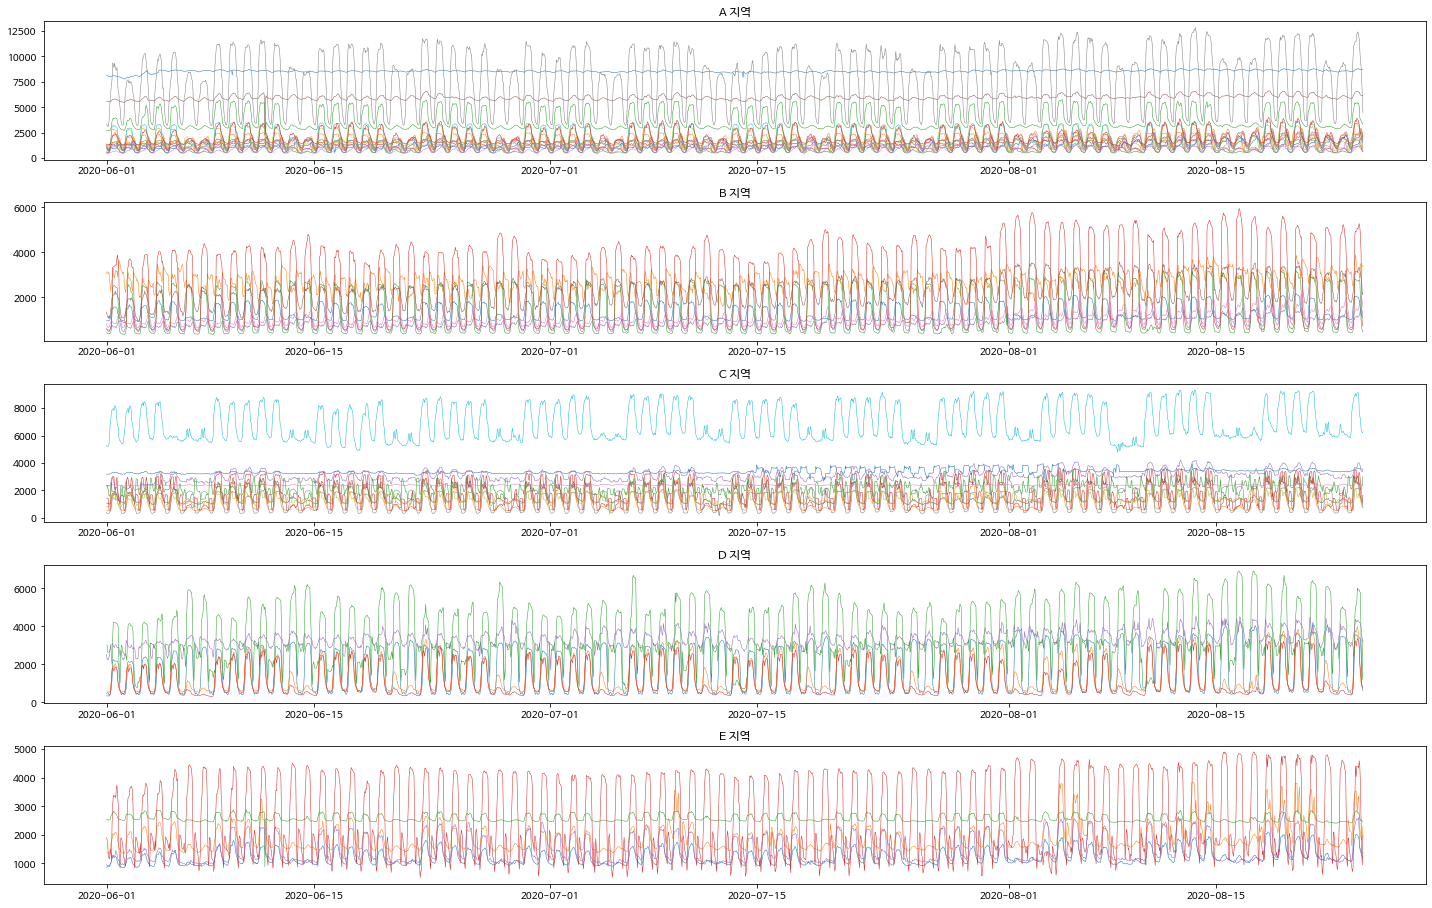

In [ ]:
plt.figure(figsize=(20,15))
area=["A 지역","B 지역","C 지역","D 지역","E 지역"]
for i,(lst_,t) in enumerate(zip(lst_2,area)):
  plt.subplot(6,1,i+1)
  for j in lst_:
    y=df.loc[df["num"]==j, "power"]
    plt.plot(time,y,linewidth=0.5)
  plt.title(t)

plt.tight_layout()
plt.show()

- 하루하루의 전력소비패턴은 건물의 용도에 따라 다르지만 전체적인 전력소비패턴에 있어서 지역 기후의 영향을 받는 것을 알수 있다.

In [ ]:
lst_df=[]
for i in range(1, 61):
  temp=df.loc[df["num"]==i,["power","time","dayname"]]
  lst_df.append(pd.pivot_table(temp,index="dayname",columns="time",values="power",aggfunc=np.median))

In [ ]:
X=np.zeros((60,168))
for i in range(0,60):
  X[i]=lst_df[i].values.reshape(1,-1)/lst_df[i].max().max()

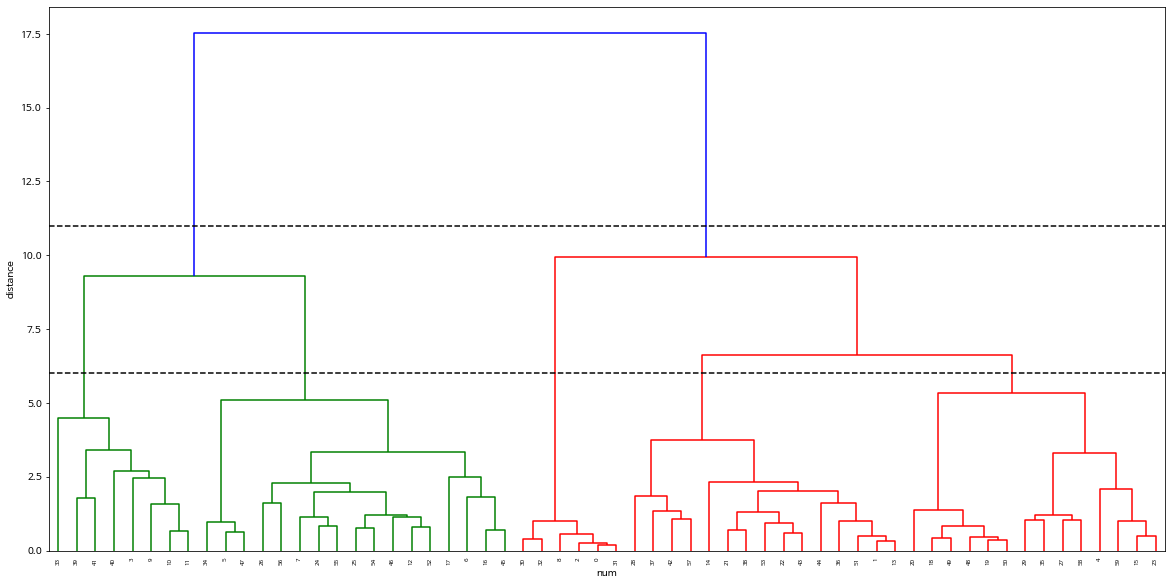

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster

plt.figure(figsize=(20,10))
linkage_array=ward(X)
dendrogram(linkage_array)

ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds, [11,11],"--",c="k")
ax.plot(bounds, [6,6],"--",c="k")
plt.xlabel("num")
plt.ylabel("distance")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(linkage_array,6,criterion='distance'))
predict.columns=['predict']

clustering_={1:predict.loc[predict["predict"]==1].index.tolist(), 2:predict.loc[predict["predict"]==2].index.tolist(),3:predict.loc[predict["predict"]==3].index.tolist(),4:predict.loc[predict["predict"]==4].index.tolist(),5:predict.loc[predict["predict"]==5].index.tolist()}

In [ ]:
for i,j in enumerate(clustering_):
  print("군집 %d:"%(i+1),len(clustering_[j]),"개 /",clustering_[j])

군집 1: 8 개 / [3, 9, 10, 11, 33, 39, 40, 41]
군집 2: 17 개 / [5, 6, 7, 12, 16, 17, 24, 25, 26, 34, 45, 46, 47, 52, 54, 55, 56]
군집 3: 6 개 / [0, 2, 8, 30, 31, 32]
군집 4: 15 개 / [1, 13, 14, 21, 22, 28, 36, 37, 38, 42, 43, 44, 51, 53, 57]
군집 5: 14 개 / [4, 15, 18, 19, 20, 23, 27, 29, 35, 48, 49, 50, 58, 59]


### 군집1

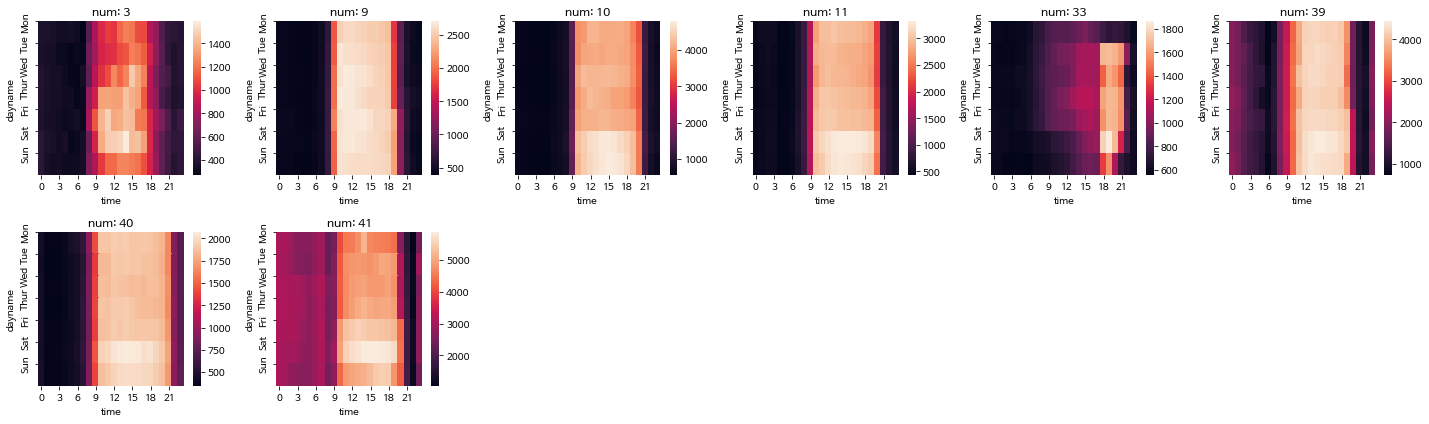

In [ ]:
plt.figure(figsize=(20,6))
for i,j in enumerate(clustering_[1]):
  plt.subplot(2,6,i+1)
  sns.heatmap(lst_df[j])
  plt.title("num: %d"%j)
  plt.yticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"],rotation=90)

plt.tight_layout()
plt.show()

군집 1은
- 일하는 시간대에 집중적으로 사용되고 있고
- 특히 주말에는 더욱 활발한 것으로 보이므로,
- 음식점이나, 상점 등의 시설로 유추해 볼 수 있다.

### 군집2

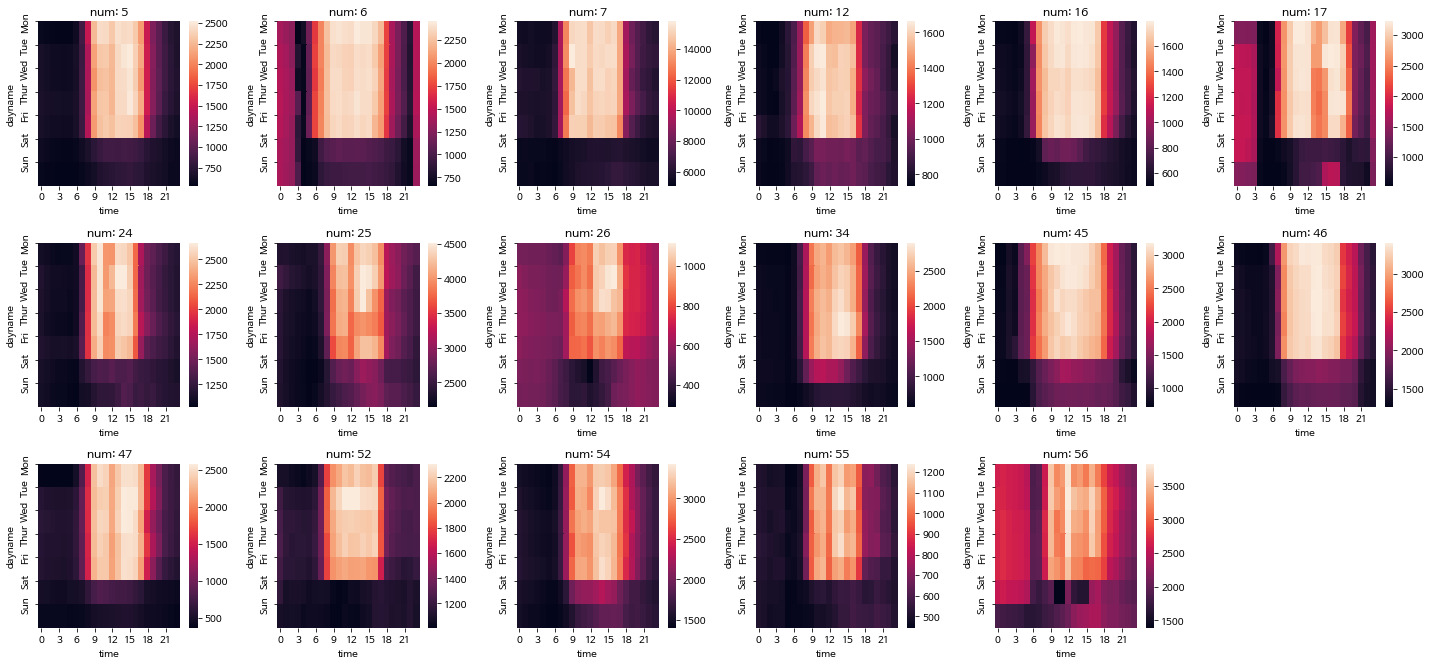

In [ ]:
plt.figure(figsize=(20,12))
for i,j in enumerate(clustering_[2]):
  plt.subplot(4,6,i+1)
  sns.heatmap(lst_df[j])
  plt.title("num: %d"%j)
  plt.yticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"],rotation=90)
plt.tight_layout()
plt.show()

군집 2는
- 일하는시간대에 특정되어 특히 활발하게 활동되고 있으며,
- 주말인 토요일, 일요일에는 사용하지 않는것으로 보이므로
- 사무실 같은 공간을 유추해 볼 수 있다.

### 군집3

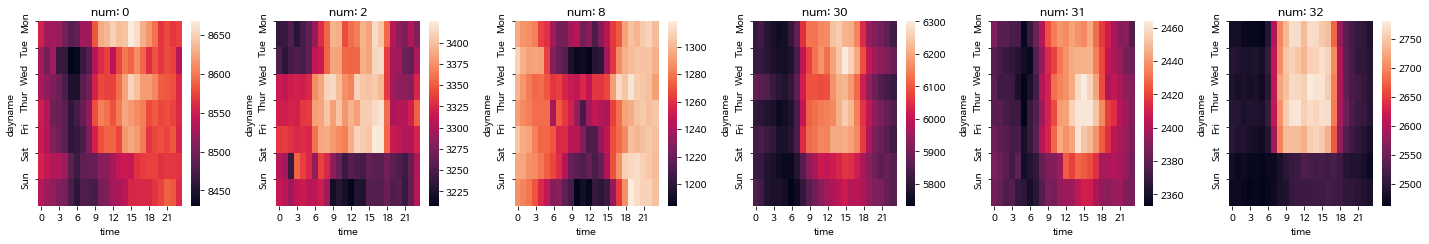

In [ ]:
plt.figure(figsize=(20,3.5))
for i,j in enumerate(clustering_[3]):
  plt.subplot(1,6,i+1)
  sns.heatmap(lst_df[j])
  plt.title("num: %d"%j)
  plt.yticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"],rotation=90)

plt.tight_layout()
plt.show()

군집3 은
- 대체적으로 24시간 돌아가는것으로 보이므로,
- 공장시설과 곳으로 유추해 볼 수 있습니다.

### 군집4

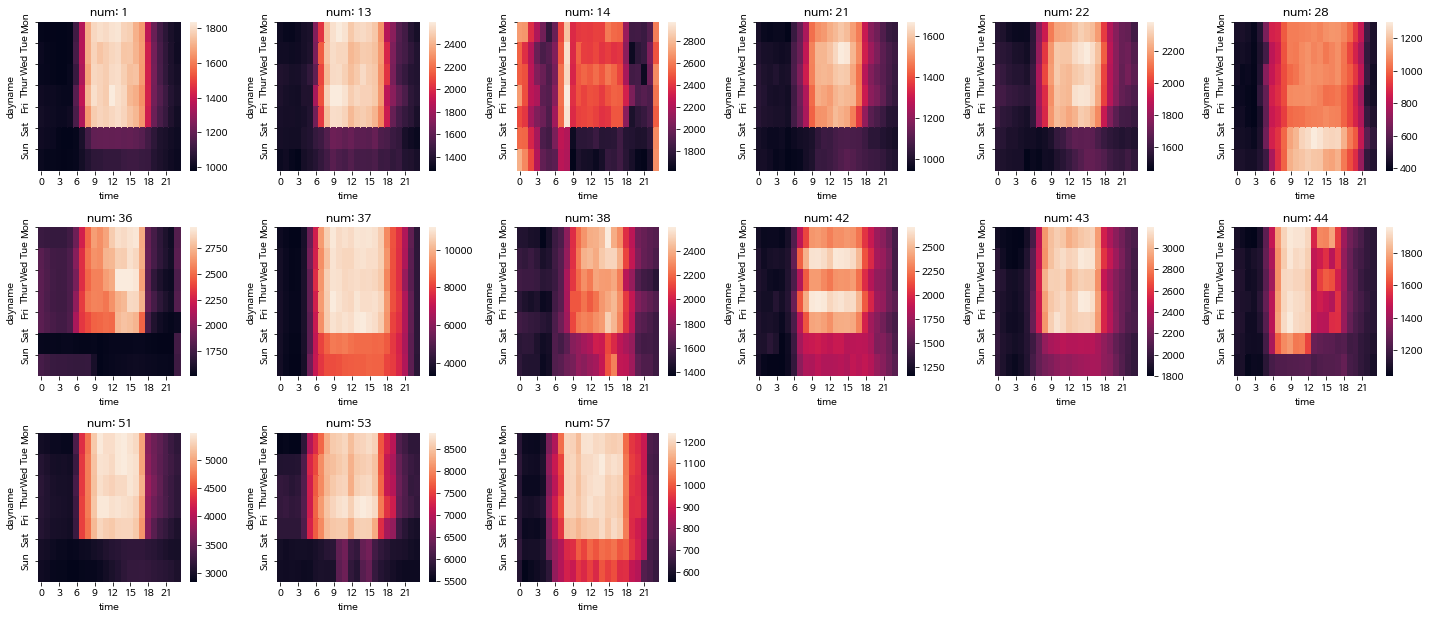

In [ ]:
plt.figure(figsize=(20,14))
for i,j in enumerate(clustering_[4]):
  plt.subplot(5,6,i+1)
  sns.heatmap(lst_df[j])
  plt.title("num: %d"%j)
  plt.yticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"],rotation=90)

plt.tight_layout()
plt.show()

군집 4는
- 위의 군집 1,2 와 얼추 비슷해 보이지만, 어떤 시설은 주말까지 활동을 하고 어떤시설은 하지않는 패턴이 보이며,
- 어떤 시설은 화, 목이 활발한 패턴이 보인다.
- 때문에, 교육시설 정도로 유추해 볼 수 있다.

### 군집 5

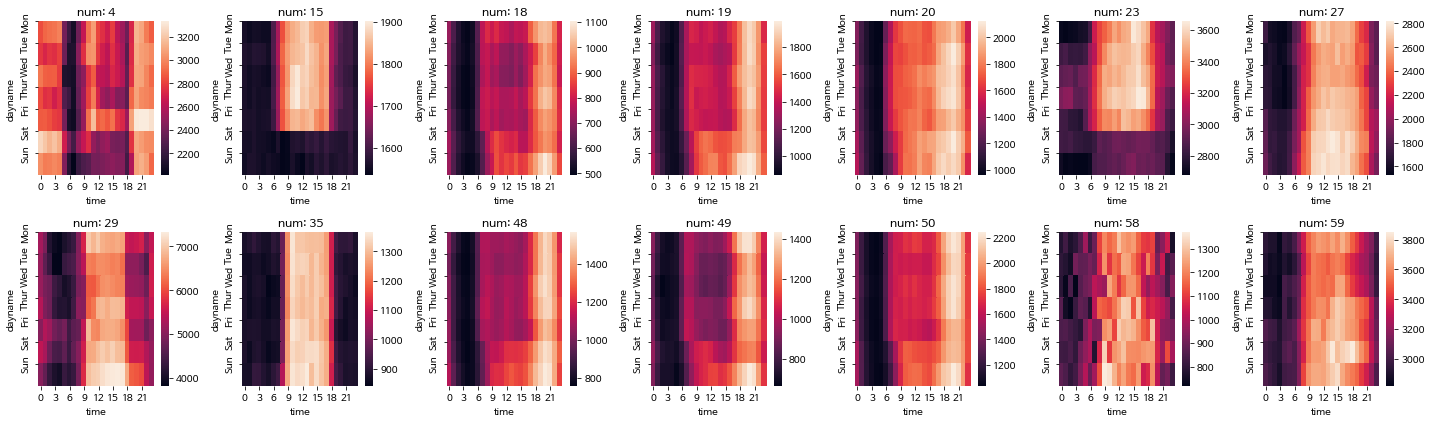

In [ ]:
plt.figure(figsize=(20,6))
for i,j in enumerate(clustering_[5]):
  plt.subplot(2,7,i+1)
  sns.heatmap(lst_df[j])
  plt.title("num: %d"%j)
  plt.yticks(list(range(7)), ["Mon","Tue", "Wed","Thur","Fri","Sat","Sun"],rotation=90)

plt.tight_layout()
plt.show()

군집 5는
- 매우 아침 이른시간부터 시작하여, 특히 오후 6시 이후에 활발한 등 규칙적인 패턴을 보인다.
- 어디인지 확정짓기 어렵지만, 지하철이나 공공시설 같은 곳을 유추해 볼 수 있다.